In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [3]:
def minimumEditDistance(s1,s2):
    if len(s1) > len(s2):
        s1,s2 = s2,s1
    distances = range(len(s1) + 1)
    for index2,char2 in enumerate(s2):
        newDistances = [index2+1]
        for index1,char1 in enumerate(s1):
            if char1 == char2:
                newDistances.append(distances[index1])
            else:
                newDistances.append(1 + min((distances[index1],
                                             distances[index1+1],
                                             newDistances[-1])))
        distances = newDistances
    return distances[-1]
 
print(minimumEditDistance("kitten","sitting"))
print(minimumEditDistance("rosettacode","raisethysword"))

3
8


In [4]:
def levenshteinDistance(str1, str2):
    m = len(str1)
    n = len(str2)
    lensum = float(m + n)
    d = []
    for i in range(m+1):
        d.append([i])
    del d[0][0]
    for j in range(n+1):
        d[0].append(j)
    for j in range(1,n+1):
        for i in range(1,m+1):
            if str1[i-1] == str2[j-1]:
                d[i].insert(j,d[i-1][j-1])
            else:
                minimum = min(d[i-1][j]+1, d[i][j-1]+1, d[i-1][j-1]+2)
                d[i].insert(j, minimum)
    ldist = d[-1][-1]
    ratio = (lensum - ldist)/lensum
    return [ldist, ratio]

print(levenshteinDistance("kitten","sitting"))
print(levenshteinDistance("rosettacode","raisethysword"))

[5, 0.6153846153846154]
[12, 0.5]


In [15]:
arr = np.empty((0,4))

answers = ["y=3a+b", "y = 3a+b", "y=3a + b", "y = 3a + b", "y = 3 a + b", "y = b + 3a", "y = b+3a", "y = 5a + 6b", "y = 12a + 6b"]

for i, ith_item in enumerate(answers):
    for j, jth_item in enumerate(answers[i+1:]):
        d, r = levenshteinDistance(ith_item, jth_item)
        arr = np.append(arr, np.array([[i, j, d, r]]), axis=0)

print(arr)

[[ 0.          0.          2.          0.85714286]
 [ 0.          1.          2.          0.85714286]
 [ 0.          2.          4.          0.75      ]
 [ 0.          3.          5.          0.70588235]
 [ 0.          4.          8.          0.5       ]
 [ 0.          5.          6.          0.57142857]
 [ 0.          6.          7.          0.58823529]
 [ 0.          7.          8.          0.55555556]
 [ 1.          0.          4.          0.75      ]
 [ 1.          1.          2.          0.88888889]
 [ 1.          2.          3.          0.84210526]
 [ 1.          3.          6.          0.66666667]
 [ 1.          4.          4.          0.75      ]
 [ 1.          5.          5.          0.73684211]
 [ 1.          6.          6.          0.7       ]
 [ 2.          0.          2.          0.88888889]
 [ 2.          1.          3.          0.84210526]
 [ 2.          2.          8.          0.55555556]
 [ 2.          3.          8.          0.5       ]
 [ 2.          4.          5.  

In [35]:
df = pd.DataFrame({'i':arr[:,0], 'j':arr[:,1], 'distance':arr[:,2], 'ratio':arr[:,3]})
print(df)

    distance    i    j     ratio
0        2.0  0.0  0.0  0.857143
1        2.0  0.0  1.0  0.857143
2        4.0  0.0  2.0  0.750000
3        5.0  0.0  3.0  0.705882
4        8.0  0.0  4.0  0.500000
5        6.0  0.0  5.0  0.571429
6        7.0  0.0  6.0  0.588235
7        8.0  0.0  7.0  0.555556
8        4.0  1.0  0.0  0.750000
9        2.0  1.0  1.0  0.888889
10       3.0  1.0  2.0  0.842105
11       6.0  1.0  3.0  0.666667
12       4.0  1.0  4.0  0.750000
13       5.0  1.0  5.0  0.736842
14       6.0  1.0  6.0  0.700000
15       2.0  2.0  0.0  0.888889
16       3.0  2.0  1.0  0.842105
17       8.0  2.0  2.0  0.555556
18       8.0  2.0  3.0  0.500000
19       5.0  2.0  4.0  0.736842
20       6.0  2.0  5.0  0.700000
21       1.0  3.0  0.0  0.952381
22       6.0  3.0  1.0  0.700000
23       6.0  3.0  2.0  0.666667
24       3.0  3.0  3.0  0.857143
25       4.0  3.0  4.0  0.818182
26       7.0  4.0  0.0  0.666667
27       7.0  4.0  1.0  0.631579
28       4.0  4.0  2.0  0.818182
29       5

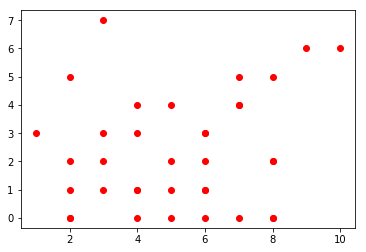

In [26]:
plt.plot(df['distance'], df['i'], 'ro')
plt.show()
# plt.plot(df['j'], df['distance'], 'ro')
# plt.show()
# plt.plot(df['ratio'], 'ro')
# plt.show()
# plt.plot(arr)
# plt.show()

In [40]:
print(df['i'].values)
print(df['j'].values)
print(df['distance'].values)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 3. 3. 3.
 3. 3. 4. 4. 4. 4. 5. 5. 5. 6. 6. 7.]
[0. 1. 2. 3. 4. 5. 6. 7. 0. 1. 2. 3. 4. 5. 6. 0. 1. 2. 3. 4. 5. 0. 1. 2.
 3. 4. 0. 1. 2. 3. 0. 1. 2. 0. 1. 0.]
[ 2.  2.  4.  5.  8.  6.  7.  8.  4.  2.  3.  6.  4.  5.  6.  2.  3.  8.
  8.  5.  6.  1.  6.  6.  3.  4.  7.  7.  4.  5.  2.  7.  8.  9. 10.  3.]


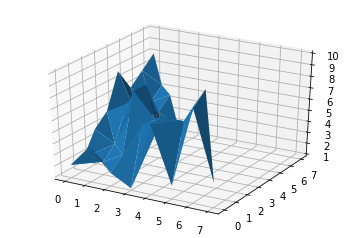

In [42]:
# Axes3D.plot_trisurf(df['i'].values, df['j'].values, df['distance'].values)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(df['i'].values, df['j'].values, df['distance'].values, linewidth=0.2, antialiased=True)

plt.show()

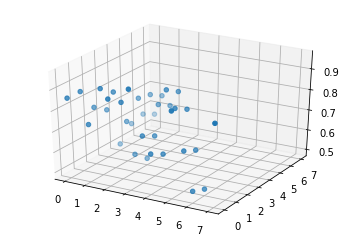

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['i'].values, df['j'].values, df['ratio'].values)
plt.show()

In [29]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(arr)